In [90]:
library(qvalue)
library(dplyr)
library(ggplot2)

In [91]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/extended_figures/"

In [92]:
### DA D52 untreated

In [93]:
#### Model 0
# Covs = PCs
# random effect: ncells noise matrix
filename0 = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_untreated/celltype_DA/top_qtl_results_all.txt"
myfile0 = read.csv(filename0,sep="\t")
head(myfile0,2)

myfile0$q_value = qvalue(myfile0$empirical_feature_p_value)$qvalues
length(unique(myfile0[myfile0$q_value < 0.05,'feature_id']))

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
5_6605829_G_T,4.526650e-04,0.2143554,0.06111680,0.3137267,5,6599352,6633404,175,175,0.5234127,210.2815,5,6605829,T,1,0.4657143,1.000000,ENSG00000037474
5_7344998_A_T,3.154604e-05,0.3821088,0.09180874,0.1073642,5,7396321,7830194,175,175,0.4945272,274.1518,5,7344998,T,1,0.1200000,0.717637,ENSG00000078295


[1] 1024

In [94]:
#### Model 1
# only one replicate per line (one pool)
# Covs = pool + sex (no PCs)
# random effect: ncells noise matrix
filename1 = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/extra_runs_addressing_reviews2/results/top_qtl_results_all.txt"

myfile1 = read.csv(filename1,sep="\t")
head(myfile1,2)

myfile1$q_value = qvalue(myfile1$empirical_feature_p_value)$qvalues
length(unique(myfile1[myfile1$q_value < 0.05,'feature_id']))

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
19_54863329_G_A,1.259930e-03,0.2653421,0.08227781,0.6389547,19,54641444,54659419,175,175,0.4733603,305.4936,19,54863329,A,1,0.1571429,0.7735054,ENSG00000088038
19_54224827_A_G,6.679699e-05,-0.3190896,0.08002417,0.1382834,19,54412589,54447195,175,175,0.5023613,231.9729,19,54224827,G,1,0.2600000,0.5587093,ENSG00000105605


[1] 608

In [95]:
genes0 = as.character(unique(myfile0[myfile0$q_value < 0.05,'feature_id']))
genes1 = as.character(unique(myfile1[myfile1$q_value < 0.05,'feature_id']))
c(length(genes0[genes0 %in% genes1]), length(genes0), length(genes1))
length(genes0[!(genes0 %in% genes1)])
length(genes1[!(genes1 %in% genes0)])

[1]  574 1024  608

[1] 450

[1] 34

In [96]:
df = inner_join(myfile0, myfile1, by = c("snp_id","feature_id"), suffix = c(".0",".1"))
### effect sizes
cor(df$beta.0, df$beta.1)
cor.test(df$beta.0, df$beta.1)

options(repr.plot.width=7, repr.plot.height=5)
p = ggplot(df, aes(x = beta.0, y = beta.1, colour = -log10(p_value.0))) + geom_point(alpha = 0.5) + 
    geom_abline(intercept = 0) + xlim(c(-2.3,2.3)) + ylim(c(-2.3,2.3)) + theme_classic()
p

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”

[1] 0.9856744


	Pearson's product-moment correlation

data:  df$beta.0 and df$beta.1
t = 295, df = 2548, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9845263 0.9867379
sample estimates:
      cor 
0.9856744 


[1] 1.726638

In [69]:
pdf(paste0(fig_dir,"Ext_Fig_6c_Model1_betas.pdf"), width=7, height=5)
p
dev.off()

png 
  2

[1] 0.9584532


	Pearson's product-moment correlation

data:  df$p_value.0 and df$p_value.1
t = 54.633, df = 2548, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7160852 0.7518666
sample estimates:
     cor 
0.734486 


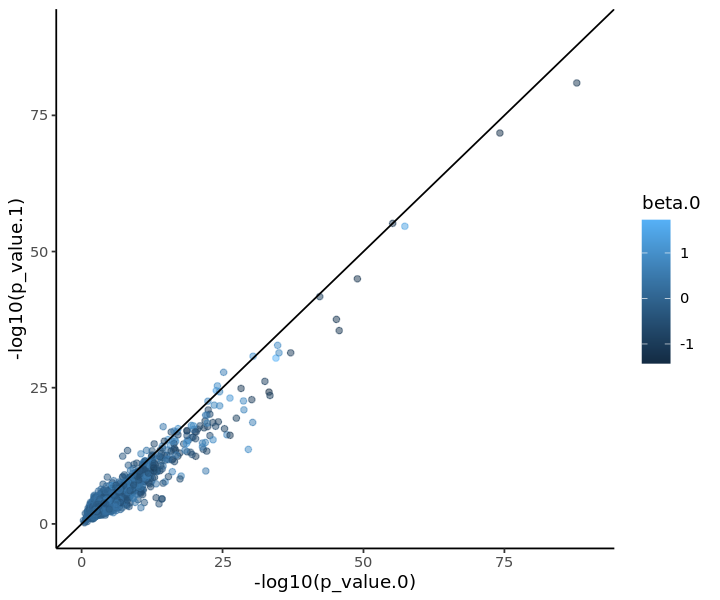

In [70]:
### p values
cor(-log10(df$p_value.0), -log10(df$p_value.1))
cor.test(df$p_value.0, df$p_value.1)

options(repr.plot.width=6, repr.plot.height=5)
p = ggplot(df, aes(x = -log10(p_value.0), y = -log10(p_value.1), colour = beta.0)) + geom_point(alpha = 0.5) + 
        geom_abline(intercept = 0) + xlim(c(0,90)) + ylim(c(0,90)) + theme_classic()
p

In [71]:
pdf(paste0(fig_dir,"Ext_Fig_6c_Model1_pvalues.pdf"), width=6, height=5)
p
dev.off()

png 
  2

In [72]:
#### Model 2
# Covs = pool (no PCs) 
# random effect: population structure (no ncells noise matrix)
filename2 = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/extra_runs_addressing_reviews/results/top_qtl_results_all.txt"
myfile2 = read.csv(filename2,sep="\t")
head(myfile2,2)

myfile2$q_value = qvalue(myfile2$empirical_feature_p_value)$qvalues
length(unique(myfile2[myfile2$q_value < 0.05,'feature_id']))

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
19_54517466_T_A,1.227606e-03,0.3767459,0.1165535,0.45311524,19,54641444,54659419,202,202,0.5783269,197.1736,19,54517466,A,1,0.1905941,0.1714938,ENSG00000088038
19_54520438_T_A,3.553206e-05,-0.4258173,0.1029847,0.03768237,19,54412589,54447195,202,202,0.6891030,210.6572,19,54520438,A,1,0.3118812,0.5113248,ENSG00000105605


[1] 320

In [73]:
genes0 = as.character(unique(myfile0[myfile0$q_value < 0.05,'feature_id']))
genes2 = as.character(unique(myfile2[myfile2$q_value < 0.05,'feature_id']))
c(length(genes0[genes0 %in% genes2]), length(genes0), length(genes2))
length(genes0[!(genes0 %in% genes2)])
length(genes2[!(genes2 %in% genes0)])

[1]  312 1024  320

[1] 712

[1] 8

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”

[1] 0.9672949


	Pearson's product-moment correlation

data:  df$beta.0 and df$beta.2
t = 130.22, df = 1166, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9633876 0.9707915
sample estimates:
      cor 
0.9672949 


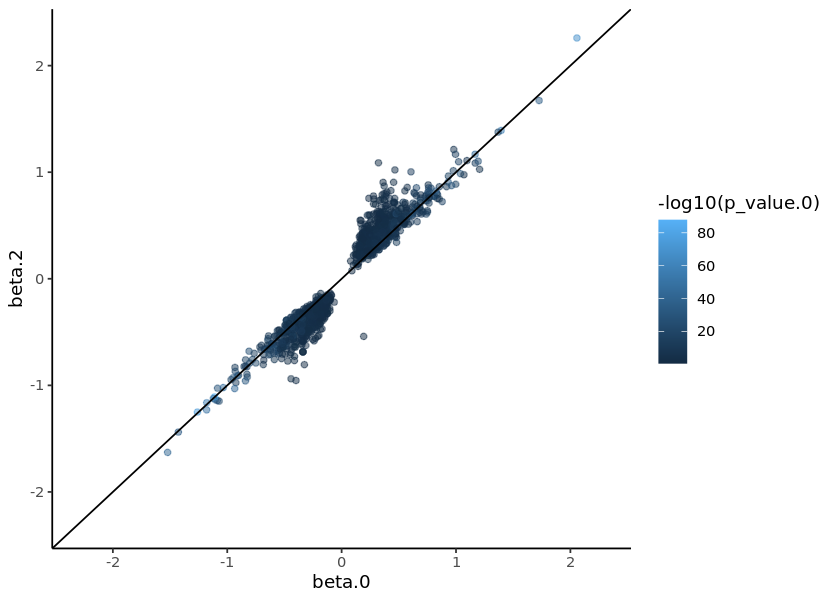

In [74]:
df = inner_join(myfile0, myfile2, by = c("snp_id","feature_id"), suffix = c(".0",".2"))
### effect sizes
cor(df$beta.0, df$beta.2)
cor.test(df$beta.0, df$beta.2)

options(repr.plot.width=7, repr.plot.height=5)
p = ggplot(df, aes(x = beta.0, y = beta.2, colour = -log10(p_value.0))) + geom_point(alpha = 0.5) + 
    geom_abline(intercept = 0) + xlim(c(-2.3,2.3)) + ylim(c(-2.3,2.3)) + theme_classic()
p

In [75]:
pdf(paste0(fig_dir,"Ext_Fig_6c_Model2_betas.pdf"), width=7, height=5)
p
dev.off()

png 
  2

[1] 0.9497887


	Pearson's product-moment correlation

data:  df$p_value.0 and df$p_value.2
t = 20.015, df = 1166, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4617064 0.5471635
sample estimates:
      cor 
0.5056743 


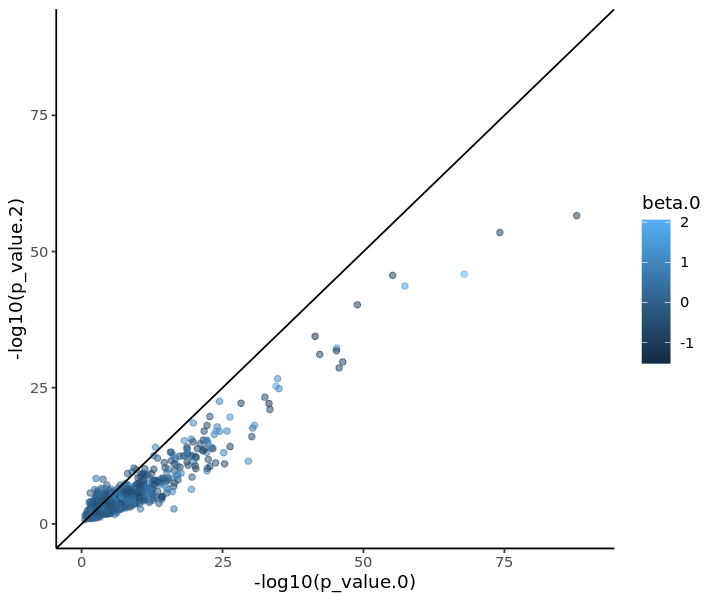

In [76]:
### p values
cor(-log10(df$p_value.0), -log10(df$p_value.2))
cor.test(df$p_value.0, df$p_value.2)

options(repr.plot.width=6, repr.plot.height=5)
ggplot(df, aes(x = -log10(p_value.0), y = -log10(p_value.2), colour = beta.0)) + geom_point(alpha = 0.5) + 
        geom_abline(intercept = 0) + xlim(c(0,90)) + ylim(c(0,90)) + theme_classic()

In [77]:
pdf(paste0(fig_dir,"Ext_Fig_6c_Model2_pvalues.pdf"), width=6, height=5)
p
dev.off()

png 
  2

In [78]:
#### Model 3
# Covs = 15 PCs
# random effect: population structure (no ncells noise matrix)
filename3 = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/extra_runs_addressing_reviews4/results/top_qtl_results_all.txt"
myfile3 = read.csv(filename3,sep="\t")
head(myfile3,2)

myfile3$q_value = qvalue(myfile3$empirical_feature_p_value)$qvalues
length(unique(myfile3[myfile3$q_value < 0.05,'feature_id']))

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
19_54854985_C_A,2.245661e-03,0.4751356,0.1554936,0.58260183,19,54641444,54659419,202,202,0.6399655,202.9670,19,54854985,A,1,0.06683168,0.04584349,ENSG00000088038
19_54224827_A_G,4.893919e-05,-0.4063564,0.1000721,0.08422001,19,54412589,54447195,202,202,0.6712116,212.5973,19,54224827,G,1,0.26237624,0.85636192,ENSG00000105605


[1] 471

In [79]:
genes0 = as.character(unique(myfile0[myfile0$q_value < 0.05,'feature_id']))
genes3 = as.character(unique(myfile3[myfile3$q_value < 0.05,'feature_id']))
c(length(genes0[genes0 %in% genes3]), length(genes0), length(genes3))
length(genes0[!(genes0 %in% genes3)])
length(genes3[!(genes3 %in% genes0)])

[1]  457 1024  471

[1] 567

[1] 14

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”

[1] 0.9753953


	Pearson's product-moment correlation

data:  df$beta.0 and df$beta.3
t = 195.02, df = 1943, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9731371 0.9774658
sample estimates:
      cor 
0.9753953 


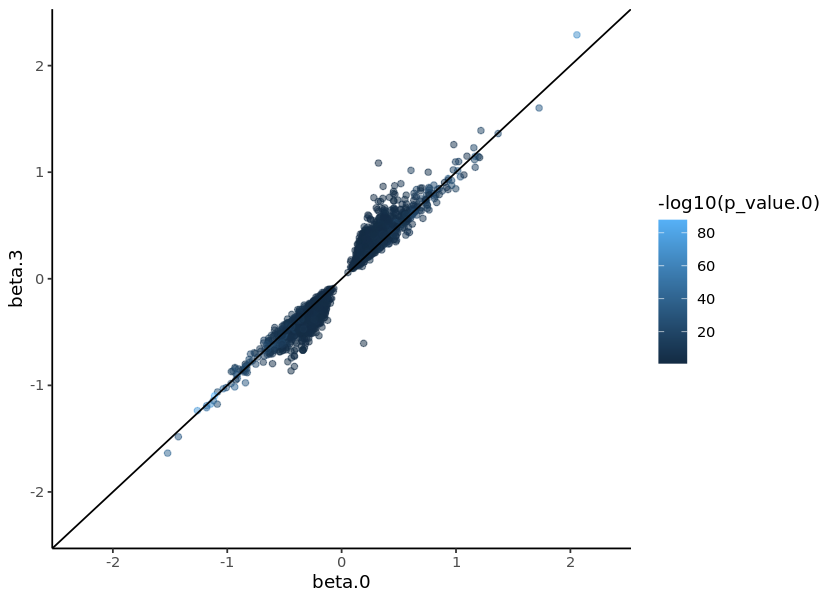

In [80]:
df = inner_join(myfile0, myfile3, by = c("snp_id","feature_id"), suffix = c(".0",".3"))
### effect sizes
cor(df$beta.0, df$beta.3)
cor.test(df$beta.0, df$beta.3)

options(repr.plot.width=7, repr.plot.height=5)
p = ggplot(df, aes(x = beta.0, y = beta.3, colour = -log10(p_value.0))) + geom_point(alpha = 0.5) + 
    geom_abline(intercept = 0) + xlim(c(-2.3,2.3)) + ylim(c(-2.3,2.3)) + theme_classic()
p

In [81]:
pdf(paste0(fig_dir,"Ext_Fig_6c_Model3_betas.pdf"), width=7, height=5)
p
dev.off()

png 
  2

[1] 0.9627079


	Pearson's product-moment correlation

data:  df$p_value.0 and df$p_value.3
t = 23.23, df = 1943, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4307018 0.5003025
sample estimates:
      cor 
0.4662233 


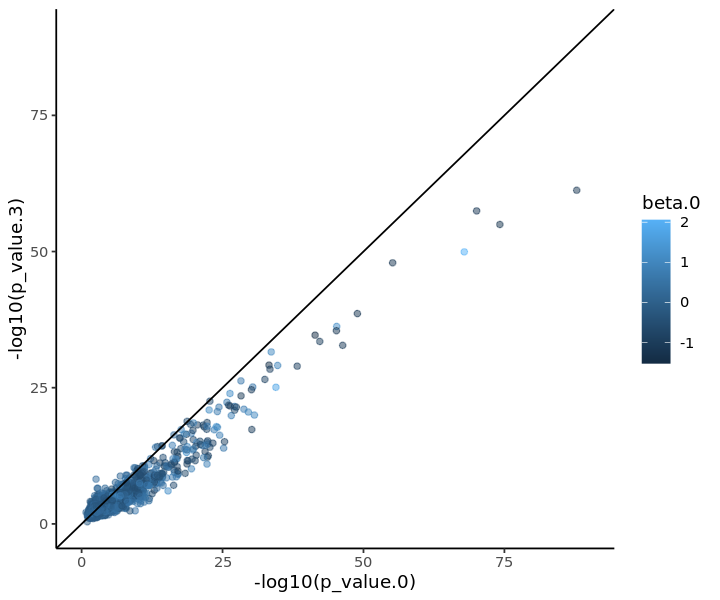

In [82]:
### p values
cor(-log10(df$p_value.0), -log10(df$p_value.3))
cor.test(df$p_value.0, df$p_value.3)

options(repr.plot.width=6, repr.plot.height=5)
p = ggplot(df, aes(x = -log10(p_value.0), y = -log10(p_value.3), colour = beta.0)) + geom_point(alpha = 0.5) + 
        geom_abline(intercept = 0) + xlim(c(0,90)) + ylim(c(0,90)) + theme_classic()
p

In [83]:
pdf(paste0(fig_dir,"Ext_Fig_6c_Model3_pvalues.pdf"), width=6, height=5)
p
dev.off()

png 
  2

In [84]:
#### Model 4
# Covs = pool (no PCs) 
# random effect: population structure + ncells noise matrix
filename4 = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/extra_runs_addressing_reviews6/results/top_qtl_results_all.txt"
myfile4 = read.csv(filename4,sep="\t")
head(myfile4,2)

myfile4$q_value = qvalue(myfile4$empirical_feature_p_value)$qvalues
length(unique(myfile4[myfile4$q_value < 0.05,'feature_id']))

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
19_54863329_G_A,3.11726e-03,0.2279045,0.07710074,0.7932248,19,54641444,54659419,202,202,0.5873805,301.9058,0,19,54863329,A,1,0.1534653,0.4285090,ENSG00000088038
19_54224827_A_G,9.07192e-05,-0.2936985,0.07503485,0.1332578,19,54412589,54447195,202,202,0.6225889,204.5014,0,19,54224827,G,1,0.2623762,0.8563619,ENSG00000105605


[1] 856

In [85]:
genes0 = as.character(unique(myfile0[myfile0$q_value < 0.05,'feature_id']))
genes4 = as.character(unique(myfile4[myfile4$q_value < 0.05,'feature_id']))
c(length(genes0[genes0 %in% genes4]), length(genes0), length(genes4))
length(genes0[!(genes0 %in% genes4)])
length(genes4[!(genes4 %in% genes0)])

[1]  734 1024  856

[1] 290

[1] 122

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”

[1] 0.9875835


	Pearson's product-moment correlation

data:  df$beta.0 and df$beta.4
t = 333.6, df = 2816, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9866377 0.9884627
sample estimates:
      cor 
0.9875835 


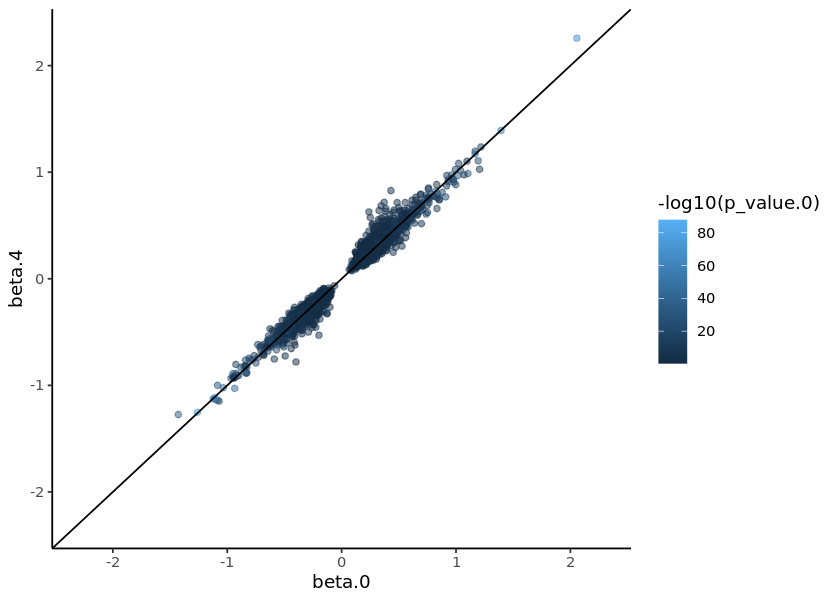

In [86]:
df = inner_join(myfile0, myfile4, by = c("snp_id","feature_id"), suffix = c(".0",".4"))
### effect sizes
cor(df$beta.0, df$beta.4)
cor.test(df$beta.0, df$beta.4)

options(repr.plot.width=7, repr.plot.height=5)
ggplot(df, aes(x = beta.0, y = beta.4, colour = -log10(p_value.0))) + geom_point(alpha = 0.5) + 
    geom_abline(intercept = 0) + xlim(c(-2.3,2.3)) + ylim(c(-2.3,2.3)) + theme_classic()

In [87]:
pdf(paste0(fig_dir,"Ext_Fig_6c_Model4_betas.pdf"), width=7, height=5)
p
dev.off()

png 
  2

[1] 0.9471164


	Pearson's product-moment correlation

data:  df$p_value.0 and df$p_value.4
t = 59.849, df = 2816, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7315231 0.7640517
sample estimates:
      cor 
0.7482367 


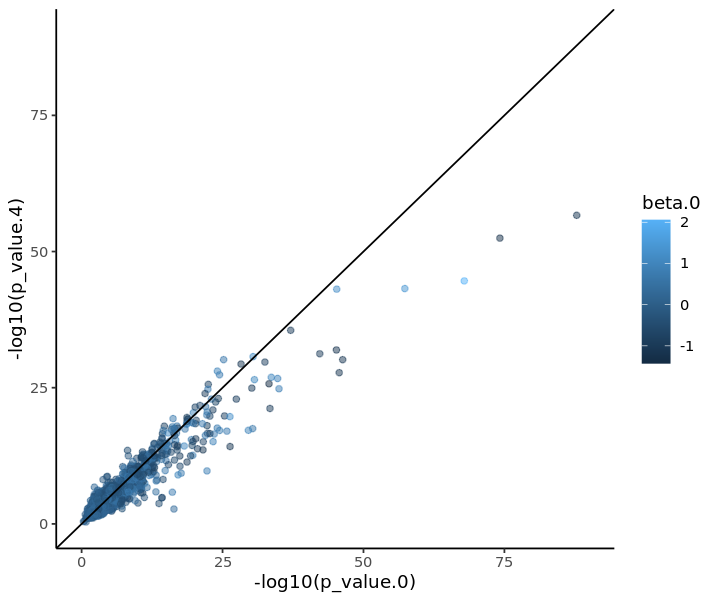

In [88]:
### p values
cor(-log10(df$p_value.0), -log10(df$p_value.4))
cor.test(df$p_value.0, df$p_value.4)

options(repr.plot.width=6, repr.plot.height=5)
p = ggplot(df, aes(x = -log10(p_value.0), y = -log10(p_value.4), colour = beta.0)) + geom_point(alpha = 0.5) + 
        geom_abline(intercept = 0) + xlim(c(0,90)) + ylim(c(0,90)) + theme_classic()
p

In [89]:
pdf(paste0(fig_dir,"Ext_Fig_6c_Model4_pvalues.pdf"), width=6, height=5)
p
dev.off()

png 
  2